In [1]:
%cd ..

/Users/deyanmihaylov/Documents/Work/PrimordialBlackHoles


In [2]:
# Import necessary modules
from pbh import PrimordialBlackHole
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
# Define parameters
spacetime = "Kerr"
initial_mass = 5.
final_mass = 1.
initial_momentum = 0.
save_path = True

In [4]:
# Create PrimordialBlackHole object
pbh = PrimordialBlackHole(
    spacetime,
    initial_mass, final_mass,
    initial_momentum,
    save_path=save_path,
)

In [5]:
# Parameters of the study
N_paths = 1000000000

zfl = len(str(N_paths-1))

In [6]:
# Execute the model N_paths times and save the paths in files
for i in range(N_paths):
    pbh.evolve()

    with h5py.File(f"data/path_{i:0{zfl}}.h5", 'w') as f:
        f.create_dataset(
            "data",
            data=np.array(pbh.path),
            compression="gzip",
            compression_opts=9,
        )

In [12]:
# Pick a random path of those generated and load the data
j = np.random.default_rng().integers(0, high=N_paths)

with h5py.File(f"data/path_{j:0{zfl}}.h5", 'r') as f:
    path = f["data"][:]

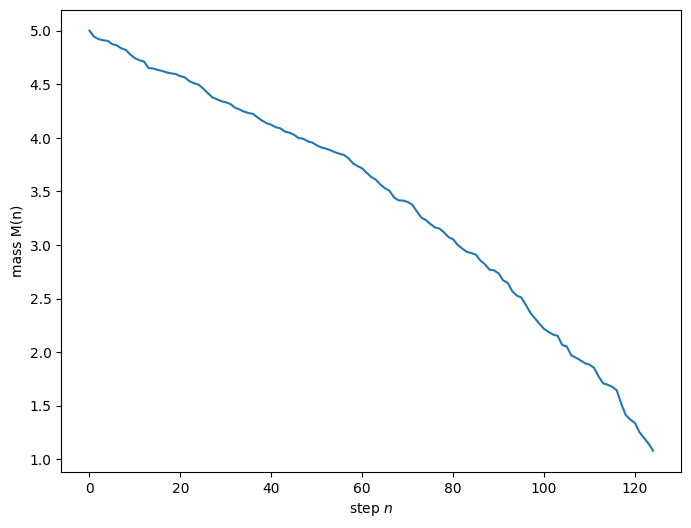

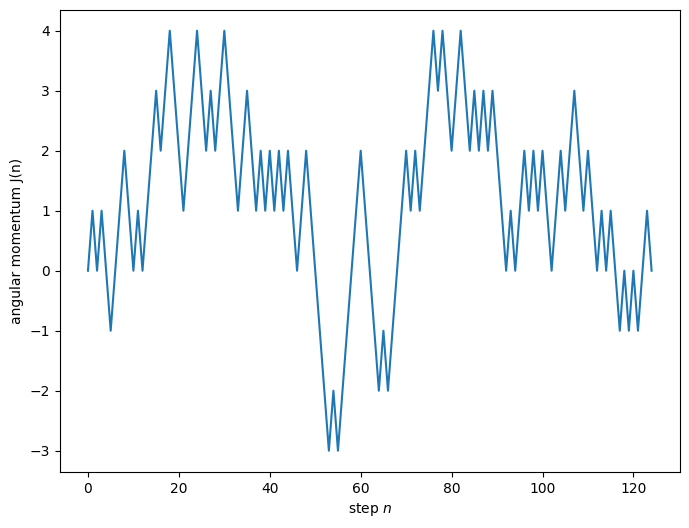

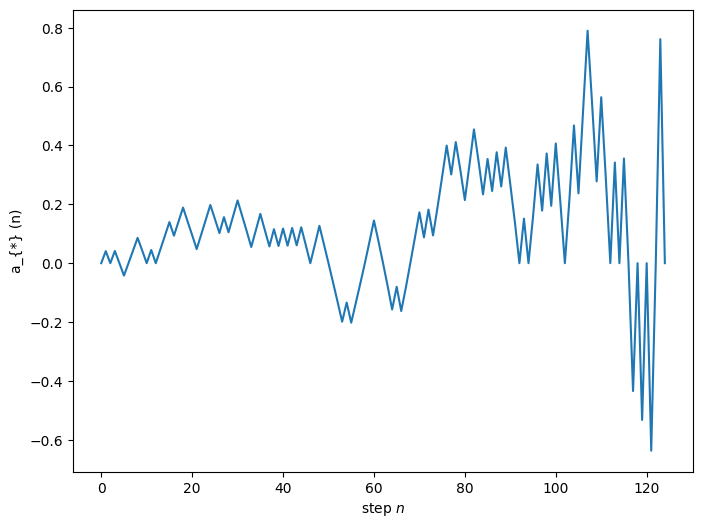

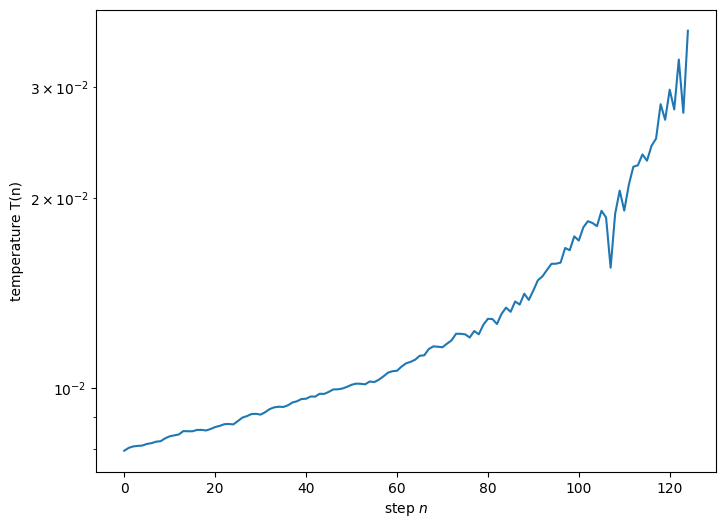

In [13]:
# Generate steps for plotting
steps = np.arange(path.shape[0])

# Plot mass evolution
plt.figure(figsize=(8, 6))
plt.plot(steps, path[:, 0])

plt.xlabel(r"step $n$")
plt.ylabel(r"mass M(n)")

plt.show()

# Plot angular momentum evolution
plt.figure(figsize=(8, 6))
plt.plot(steps, path[:, 1])

plt.xlabel(r"step $n$")
plt.ylabel(r"angular momentum J(n)")

plt.show()

# Plot a_* (spin parameter) evolution
plt.figure(figsize=(8, 6))
plt.plot(steps, path[:, 2])

plt.xlabel(r"step $n$")
plt.ylabel(r"a_{*} (n)")

plt.show()

# Plot temperature evolution
plt.figure(figsize=(8, 6))
plt.plot(steps, path[:, 4])

plt.yscale('log')

plt.xlabel(r"step $n$")
plt.ylabel(r"temperature T(n)")

plt.show()